In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
from tqdm.auto import tqdm
from collections import Counter
import warnings 
warnings.filterwarnings('ignore')

In [2]:
submission = pd.read_csv("sample_submission.csv")

In [3]:
df_train = pd.read_csv("train_Inceptez20.csv")

In [4]:
df_train.head(10)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
5,ID00006,1.018709,0.07,0.519231,C6,13051,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
6,ID00007,0.097992,0.16,0.403846,C7,6112,4,B2,M5,Diesel,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
7,ID00008,0.509085,0.14,0.423077,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
8,ID00009,0.282394,0.07,0.298077,C7,6112,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
9,ID00010,0.566255,0.04,0.442308,C9,17804,1,B2,M7,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         50000 non-null  object 
 1   policy_tenure                     50000 non-null  float64
 2   age_of_car                        50000 non-null  float64
 3   age_of_policyholder               50000 non-null  float64
 4   area_cluster                      50000 non-null  object 
 5   population_density                50000 non-null  int64  
 6   make                              50000 non-null  int64  
 7   segment                           50000 non-null  object 
 8   model                             50000 non-null  object 
 9   fuel_type                         50000 non-null  object 
 10  max_torque                        50000 non-null  object 
 11  max_power                         50000 non-null  object 
 12  engi

In [6]:
df_test = pd.read_csv("test_Inceptez20.csv")

In [7]:
df_train.columns.difference(df_test.columns)

Index(['is_claim'], dtype='object')

In [8]:
print("Train data:",df_train.shape)
print("Test data:",df_test.shape)

Train data: (50000, 44)
Test data: (8592, 43)


In [9]:
data = pd.concat([df_train,df_test],axis = 0)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58592 entries, 0 to 8591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engin

In [11]:
data.shape

(58592, 44)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58592 entries, 0 to 8591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engin

In [13]:
data['policy_id'].nunique()

58592

In [14]:
data.isna().sum()

policy_id                              0
policy_tenure                          0
age_of_car                             0
age_of_policyholder                    0
area_cluster                           0
population_density                     0
make                                   0
segment                                0
model                                  0
fuel_type                              0
max_torque                             0
max_power                              0
engine_type                            0
airbags                                0
is_esc                                 0
is_adjustable_steering                 0
is_tpms                                0
is_parking_sensors                     0
is_parking_camera                      0
rear_brakes_type                       0
displacement                           0
cylinder                               0
transmission_type                      0
gear_box                               0
steering_type   

In [15]:
data['is_claim'].value_counts()

0.0    46771
1.0     3229
Name: is_claim, dtype: int64

In [16]:
data.duplicated().sum()

0

In [17]:
num_col = data.select_dtypes(include = np.number).columns.to_list()

In [18]:
num_col

['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'make',
 'airbags',
 'displacement',
 'cylinder',
 'gear_box',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'ncap_rating',
 'is_claim']

In [19]:
str_col = data.select_dtypes(exclude = np.number).columns.to_list()

In [20]:
str_col

['policy_id',
 'area_cluster',
 'segment',
 'model',
 'fuel_type',
 'max_torque',
 'max_power',
 'engine_type',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'steering_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

In [21]:
data.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,50000.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.064580
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.245786
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [22]:
data.corr()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
policy_tenure,1.000000,0.166312,0.143676,-0.100307,0.086101,0.103981,0.194361,0.191185,0.095305,0.166426,0.190869,0.213228,0.119055,0.141027,0.173280,0.081084
age_of_car,0.166312,1.000000,-0.035427,-0.062255,0.188122,0.209073,0.393208,0.379522,0.201579,0.332716,0.383177,0.414104,0.259156,0.302127,0.348853,-0.030382
age_of_policyholder,0.143676,-0.035427,1.000000,0.009669,-0.031989,-0.008041,-0.023764,0.004183,-0.003115,-0.016764,-0.020138,-0.006135,-0.053930,-0.007758,-0.031628,0.023211
population_density,-0.100307,-0.062255,0.009669,1.000000,-0.035125,-0.060359,-0.090983,-0.091591,-0.056640,-0.077501,-0.091968,-0.098156,-0.065583,-0.077816,-0.071150,-0.019441
make,0.086101,0.188122,-0.031989,-0.035125,1.000000,0.501800,0.753344,0.410672,0.632807,0.753861,0.692365,0.511695,0.303274,0.481408,0.792254,-0.003168
airbags,0.103981,0.209073,-0.008041,-0.060359,0.501800,1.000000,0.661190,0.478594,0.859556,0.810820,0.809094,0.639562,0.423816,0.828988,0.341557,-0.000476
displacement,0.194361,0.393208,-0.023764,-0.090983,0.753344,0.661190,1.000000,0.866231,0.692240,0.875407,0.961655,0.899302,0.554591,0.776210,0.847065,0.004639
cylinder,0.191185,0.379522,0.004183,-0.091591,0.410672,0.478594,0.866231,1.000000,0.410163,0.615806,0.805476,0.862430,0.352118,0.602978,0.598364,0.011348
gear_box,0.095305,0.201579,-0.003115,-0.056640,0.632807,0.859556,0.692240,0.410163,1.000000,0.861740,0.808975,0.601923,0.579725,0.894639,0.529688,-0.003324
turning_radius,0.166426,0.332716,-0.016764,-0.077501,0.753861,0.810820,0.875407,0.615806,0.861740,1.000000,0.944899,0.825603,0.460436,0.823097,0.779302,-0.000854


# EDA

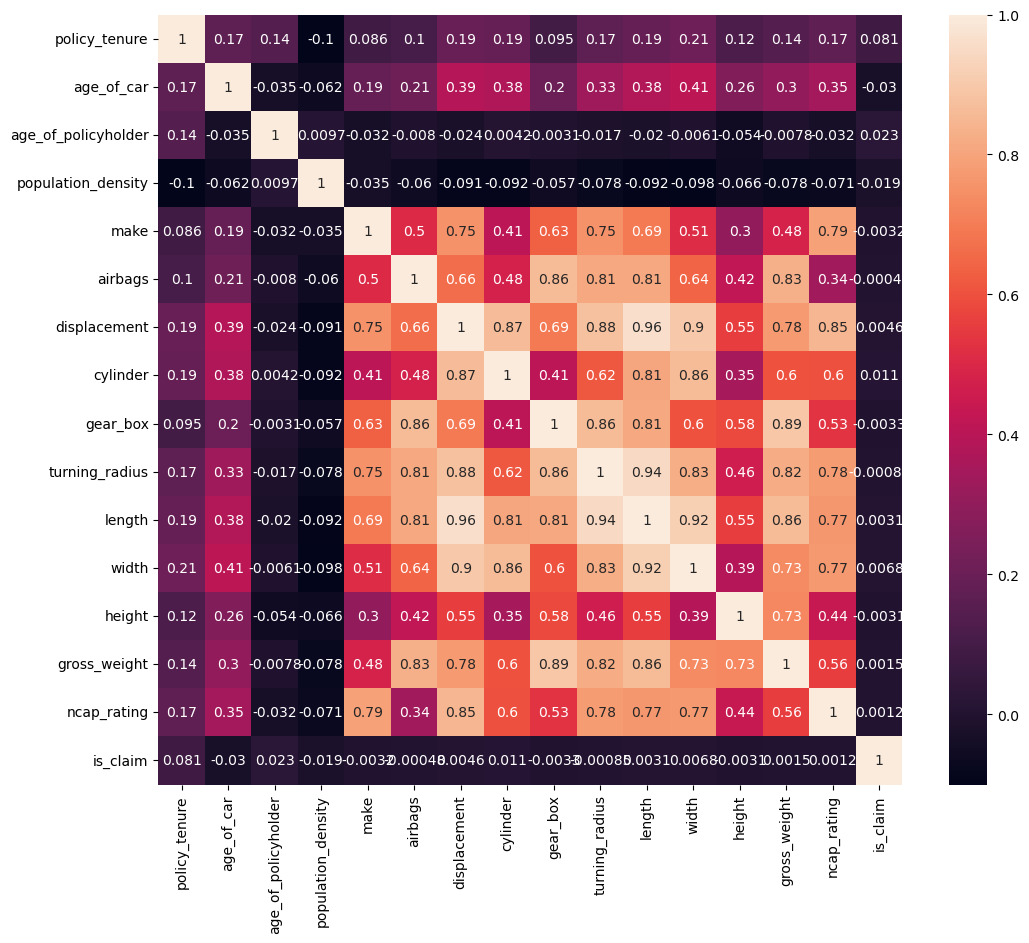

In [23]:
plt.figure(figsize = (12,10))
sns.heatmap(data.corr(),annot = True,annot_kws = {'size': 10})
plt.show()

In [24]:
Counter(data.is_claim)

Counter({0.0: 46771,
         1.0: 3229,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
       

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58592 entries, 0 to 8591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engin

In [26]:
for columns in tqdm(data.columns):
    if dict(data.dtypes)[columns] == 'object':        
        label_encoder = preprocessing.LabelEncoder()
        data[columns] = label_encoder.fit_transform(data[columns])

  0%|          | 0/44 [00:00<?, ?it/s]

In [27]:
data.head(30)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0,0.515874,0.05,0.644231,0,4990,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0.0
1,1,0.672619,0.02,0.375000,11,27003,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0.0
2,2,0.841110,0.02,0.384615,15,4076,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0.0
3,3,0.900277,0.11,0.432692,16,21622,1,3,3,2,...,1,1,1,1,1,1,1,1,2,0.0
4,4,0.596403,0.11,0.634615,17,34738,2,0,4,2,...,0,1,1,1,0,1,1,1,2,0.0
5,5,1.018709,0.07,0.519231,18,13051,3,4,5,1,...,1,1,1,1,1,0,1,1,3,0.0
6,6,0.097992,0.16,0.403846,19,6112,4,2,6,1,...,0,1,1,1,0,0,1,1,5,0.0
7,7,0.509085,0.14,0.423077,20,8794,1,2,7,2,...,1,1,1,1,1,1,1,1,2,0.0
8,8,0.282394,0.07,0.298077,19,6112,3,4,5,1,...,1,1,1,1,1,0,1,1,3,0.0
9,9,0.566255,0.04,0.442308,21,17804,1,2,8,2,...,1,1,1,1,1,1,1,1,0,0.0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58592 entries, 0 to 8591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  int32  
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  int32  
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  int32  
 8   model                             58592 non-null  int32  
 9   fuel_type                         58592 non-null  int32  
 10  max_torque                        58592 non-null  int32  
 11  max_power                         58592 non-null  int32  
 12  engin

In [29]:
data.isna().sum()

policy_id                              0
policy_tenure                          0
age_of_car                             0
age_of_policyholder                    0
area_cluster                           0
population_density                     0
make                                   0
segment                                0
model                                  0
fuel_type                              0
max_torque                             0
max_power                              0
engine_type                            0
airbags                                0
is_esc                                 0
is_adjustable_steering                 0
is_tpms                                0
is_parking_sensors                     0
is_parking_camera                      0
rear_brakes_type                       0
displacement                           0
cylinder                               0
transmission_type                      0
gear_box                               0
steering_type   

In [30]:
train_df = data.loc[data['is_claim'].isna()==False]
test_df = data.loc[data['is_claim'].isna()==True]


X_main_test = test_df.drop(['is_claim'],axis = 1)


In [31]:
x = train_df.drop(['is_claim'],axis = 1)
y = train_df['is_claim']

In [32]:
train_x, val_x, train_y, val_y = train_test_split(x,y,test_size = 0.2,random_state=2)

In [33]:
train_x.shape

(40000, 43)

In [34]:
val_x.shape

(10000, 43)

In [35]:
train_y.shape

(40000,)

In [36]:
val_y.shape

(10000,)

In [37]:
df_test.shape

(8592, 43)

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
val_x = sc.transform(val_x)
X_main_test_sc = sc.transform(X_main_test)

In [39]:
clf_0 = LogisticRegression().fit(train_x,train_y)


In [40]:
pred_y_0 = clf_0.predict(val_x)
accuracy_score(pred_y_0,val_y)

0.9344

In [42]:
confusion_matrix(val_y,pred_y_0)

array([[9344,    0],
       [ 656,    0]], dtype=int64)

In [40]:
pred_test = clf_0.predict(X_main_test_sc)

predictions_test_final = ['1' if y>0.5 else '0' for y in pred_test]

submission['is_claim'] = predictions_test_final
submission.to_csv("abc.csv",index = False)